### Feature Selection Using Pearson Correlation

   Pearson correlation, also known as Pearson's correlation coefficient, is a statistical measure used to quantify the strength and direction of the linear relationship between two continuous variables. It is denoted by the symbol "r" and falls within the range of -1 to 1.

https://chat.openai.com/share/3b7ce11a-5cfa-4283-b865-362d55be2a97

### Applying in Small dataset

In [90]:
# import fetch_california_housing dataset from sklearn
# import necessary libraries

from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

All the feature name,data,column name and target are dictionary inside the sklearn library.So we are access the data looks below,

In [91]:
# Loading the dataset

data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)

In [92]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [93]:
df.shape

(20640, 8)

In [94]:
target = pd.DataFrame(data.target,columns = ['Target'])

In [95]:
target

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [96]:
# Independent and dependent variable

X = df
y = target

print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   Target
0   4.526
1   3.585
2   3.521
3   3.413
4   3.422


In [97]:
# train_test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

X_train.shape,X_test.shape

((14448, 8), (6192, 8))

### Remember

- The feature is highly correlated to dependent feature that feature is very important. (Do not remove that)
- If the two or more features are correlated to dependent feature at that time use any one of the feature among the three feature.(Delete all other feature)
- The Correlation value or percentage is decided by threshold.
- Threshold value assigned by manual or using cross validation.
- After finding the correlation between the feature on X_train, The dropping of the feature performing in X_train the same feature deletion is on X_test.(No need to find seperate correlation for X_test)

### Pearson Correlation applied in data and plot

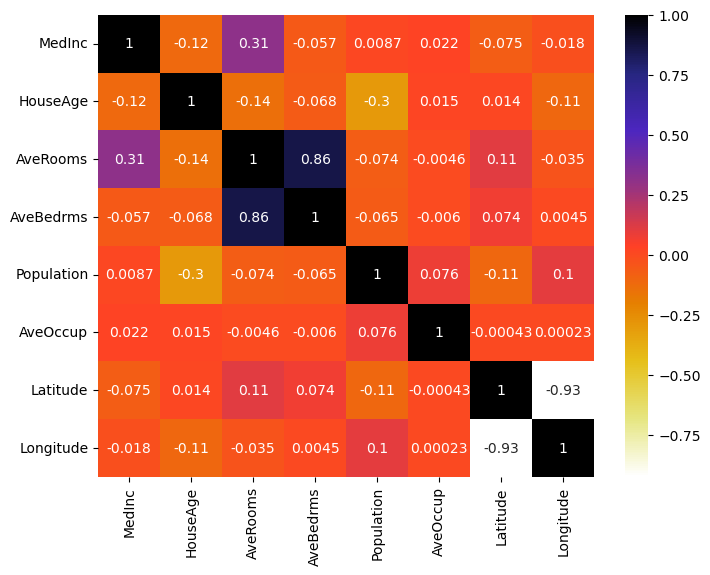

In [98]:
import seaborn as sns
plt.figure(figsize=(8,6))

# Perform Pearson Correlation 
corr = X_train.corr()

# Using Heatmap to visualize
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [99]:
 X_train.corr() # The person correlation value range from -1 to 1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120747,0.309773,-0.056635,0.008750,0.022190,-0.075278,-0.017947
HouseAge,-0.120747,1.000000,-0.142212,-0.067726,-0.300492,0.015183,0.013739,-0.109594
AveRooms,0.309773,-0.142212,1.000000,0.861018,-0.074187,-0.004634,0.111738,-0.035231
AveBedrms,-0.056635,-0.067726,0.861018,1.000000,-0.064854,-0.005973,0.073954,0.004492
Population,0.008750,-0.300492,-0.074187,-0.064854,1.000000,0.075679,-0.110312,0.100657
AveOccup,0.022190,0.015183,-0.004634,-0.005973,0.075679,1.000000,-0.000428,0.000228
Latitude,-0.075278,0.013739,0.111738,0.073954,-0.110312,-0.000428,1.000000,-0.926133
Longitude,-0.017947,-0.109594,-0.035231,0.004492,0.100657,0.000228,-0.926133,1.000000


#### What's Next ?

Next we create the function to take highly correlated feature.Suppose the two feature are highly correlated with each other.Drop any one of the feature.The feature is selected by applying threshold.

In [100]:
# function we can select highly correlated features

def correlation(data,threshold):
    col_corr = set() # This variable store the correlated column (Using set means it won't allows duplicate)
    corr_matrix = data.corr()
    
    # To traverse the matrix using for loop
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # Checking for threshold
            if (corr_matrix.iloc[i,j]) > threshold:  # using [ if abs(corr_matrix.iloc[i,j]) > threshold ] it takes also highly negative correlated value also because sometimes negative correlation feature also good to train ML model eficiently
                colname = corr_matrix.columns[i]  # Getting the column name
                # Suppose using [ colname = corr_matrix.columns[j] ] it show vice versa it is also correct 
                col_corr.add(colname)
    return col_corr

In [101]:
# Calling the function and apply

correlation(X_train,0.8)

{'AveBedrms'}

- suppose use i to get AveBedrms
- suppose use j to get AveRooms

Both are vice versa so use anyone and drop any one of the feature.

suppose the three or more features use any one feature and delete rest of them.

In [102]:
d_feature = correlation(X_train,0.8)
len(d_feature)

1

In [103]:
# Dropping the feature 

X_train.drop(d_feature,axis = 1)
X_test.drop(d_feature,axis = 1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
7310,2.4516,36.0,3.606232,1398.0,3.960340,33.99,-118.19
4402,2.4677,49.0,3.793855,2862.0,2.836472,34.09,-118.28
1929,4.6394,22.0,6.806691,813.0,3.022305,38.66,-121.07
11551,3.3438,37.0,4.630037,783.0,2.868132,33.75,-117.98
9882,3.0608,22.0,4.750515,3794.0,2.607560,36.68,-121.79
...,...,...,...,...,...,...,...
16942,3.9688,52.0,4.877593,1126.0,2.336100,37.56,-122.31
893,4.6641,29.0,6.011966,1724.0,2.947009,37.54,-121.95
11723,3.0100,21.0,10.553648,584.0,2.506438,39.25,-120.06
244,2.3906,44.0,4.865574,2269.0,3.719672,37.78,-122.22


### Applying in Big dataset

In [104]:
df = pd.read_csv('D:\\Feature Selection\\Datasets\\Santander Dataset\\train.csv',nrows = 10000)

In [105]:
# Independent and dependent feature

X = df.drop(['TARGET'],axis=1)
y = df['TARGET']

In [106]:
# Performing train_test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 43)

In [107]:
X_train.shape,X_test.shape

((7000, 370), (3000, 370))

<Axes: >

<Figure size 800x600 with 0 Axes>

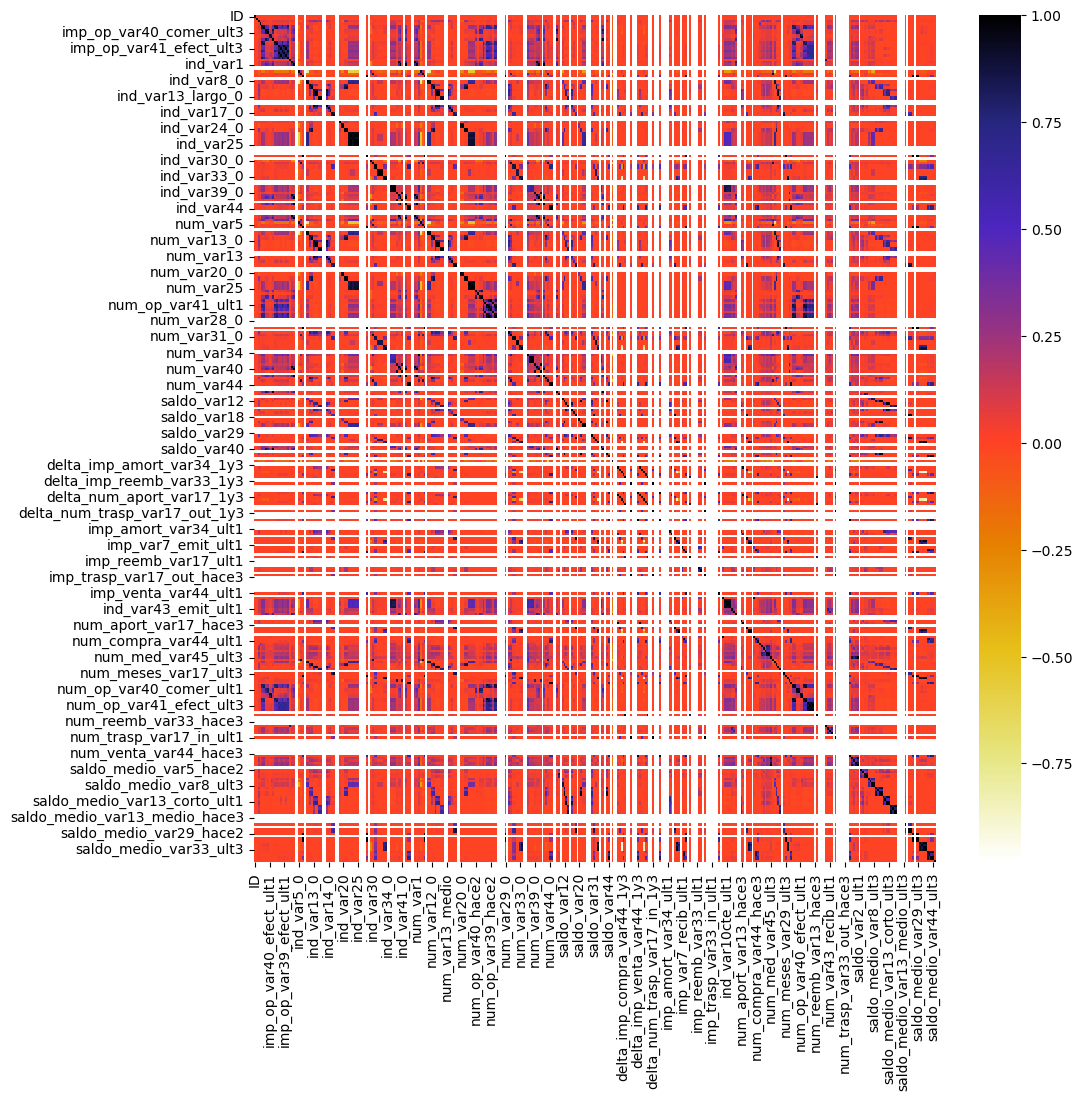

In [108]:
import seaborn as sns
plt.figure(figsize=(8,6))

# Perform Pearson Correlation 
corr = X_train.corr()

# Using Heatmap to visualize
# It has more column so visualize fig,ax method using small inches
fig,ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr,cmap=plt.cm.CMRmap_r)

In [109]:
# Calling the function and apply

set(correlation(X_train,0.8))

{'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_compra_var44_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var12',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var17',
 'ind_var20',
 'ind_var24',
 'ind_var24_0',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29_0',
 'ind_var30',
 'ind_var31',


In [110]:
len(set(correlation(X_train,0.8))) # Set does not contain duplicate value so use sets

181

The 181 features are highly correlated with each other.

In [111]:
# Dropping the feature 

d_feature = set(correlation(X_train,0.8))

X_train.drop(d_feature,axis = 1)
X_test.drop(d_feature,axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace3,var38
9415,18936,2,29,0.0,0.0,0.0,0,0.0,0,0,...,0.00,0.0,0,0,0,0,0.0,0.0,0,195025.890000
6377,12813,2,36,0.0,0.0,0.0,0,0.0,0,0,...,0.00,0.0,0,0,0,0,0.0,0.0,0,29860.170000
8019,16167,2,24,0.0,0.0,0.0,0,0.0,0,0,...,0.00,0.0,0,0,0,0,0.0,0.0,0,117310.979016
7754,15604,2,54,210.0,570.0,0.0,0,210.0,0,0,...,0.00,0.0,0,0,0,0,0.0,0.0,0,72420.600000
4961,9923,2,23,0.0,0.0,0.0,0,0.0,0,0,...,0.00,0.0,0,0,0,0,0.0,0.0,0,265649.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9363,18828,2,48,0.0,0.0,0.0,0,0.0,0,0,...,1600.02,0.0,0,0,0,0,0.0,0.0,0,69240.660000
9448,19001,2,25,0.0,0.0,0.0,0,0.0,0,0,...,0.00,0.0,0,0,0,0,0.0,0.0,0,29134.950000
9605,19292,2,60,0.0,0.0,0.0,0,0.0,0,0,...,0.00,0.0,0,0,0,0,0.0,0.0,0,117310.979016
9486,19069,2,68,18495.0,73.8,0.0,0,0.0,0,0,...,0.00,0.0,0,0,0,0,0.0,0.0,0,180223.290000
